<a href="https://colab.research.google.com/github/calisolo/Levels_image_captioning_NICE/blob/master/Levels_quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%cd /content

!git clone https://github.com/calisolo/Levels_image_captioning_NICE/
!git clone https://huggingface.co/datasets/calisolo/NICE_tsv/  #dataset
#!git clone https://huggingface.co/calisolo/OFA_huge_NICE_captioning #download model checkpoint manually

%cd ./Levels_image_captioning_NICE

/content
fatal: destination path 'Levels_image_captioning_NICE' already exists and is not an empty directory.
Cloning into 'NICE_tsv'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), 1.25 KiB | 1.25 MiB/s, done.
Filtering content: 100% (2/2), 890.00 MiB | 41.83 MiB/s, done.
/content/Levels_image_captioning_NICE


In [4]:
!pip install transformers==4.20.0
!pip install loguru
!pip install pycocoevalcap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd

In [6]:
val_set = pd.read_csv(f'data/nice-val-5k.csv')
inference_model = 'calisolo/OFA_huge_NICE_captioning'
cosine = pd.read_csv('./data/encoder/test_fully_parsed_final_2.csv')

In [7]:
val_dict = {}
for index, i in enumerate(val_set['public_id']):
  val_dict[i] = val_set['caption_gt'][index]

In [8]:
#making Levels hint

import ast
caption_result = {}

for index, public_id in enumerate(cosine['0']):
  processed_data = ''
  processed_data = cosine['cos1'][index] + cosine['diff1'][index] + cosine['cat1'][index]+ val_dict[cosine['key1'][index]]
  processed_data += cosine['cos2'][index] + cosine['diff2'][index] + cosine['cat2'][index]+val_dict[cosine['key2'][index]]
  processed_data += cosine['cos3'][index] + cosine['diff3'][index] + cosine['cat3'][index]+val_dict[cosine['key3'][index]]
  processed_data += cosine['cos4'][index] + cosine['diff4'][index] + cosine['cat4'][index]+val_dict[cosine['key4'][index]]
  processed_data += '[shot_style]'

  
  shotlist = ast.literal_eval(cosine['shots'][index])
  locationlist = ast.literal_eval(cosine['locations'][index])
  if shotlist == []:
    processed_data += '[NULL]'
  else:
    for shot in shotlist:
      processed_data += shot + ' | '
  processed_data += '[Location]'
  if locationlist == []:
    processed_data += '[NULL]'
  else:
    for location in locationlist:
      processed_data += location + ' | '
  caption_result[str(public_id)] = processed_data
  
for i in caption_result: # how hint looks like
  print(caption_result[i])
  break

[cosHint lv1][diffHint lv1][outdoors]Young Couples Sitting On Grass With Arms In The Air[cosHint lv1][diffHint lv1][misc]Four young friends relaxing on sandy beach and taking a photo together[cosHint lv1][diffHint lv1][outdoors]Low angle view of man playing guitar at park[cosHint lv1][diffHint lv1][office]bartender Serving young women Pints Of Beer In the Bar[shot_style]Close up | Close up of | [Location][NULL]


calisolo/OFA_huge_NICE_captioning
./vocab
<super: <class 'OFATokenizer'>, <OFATokenizer object>>


  0%|          | 0/21377 [00:00<?, ?it/s]

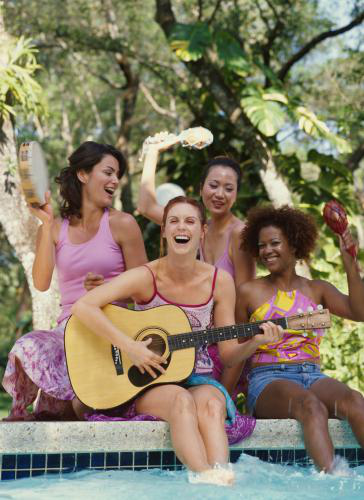

  0%|          | 1/21377 [00:12<72:39:58, 12.24s/it]

 what does the image describe?[cosHint lv1][diffHint lv1][outdoors]Young Couples Sitting On Grass With Arms In The Air[cosHint lv1][diffHint lv1][misc]Four young friends relaxing on sandy beach and taking a photo together[cosHint lv1][diffHint lv1][outdoors]Low angle view of man playing guitar at park[cosHint lv1][diffHint lv1][office]bartender Serving young women Pints Of Beer In the Bar[shot_style]Close up | Close up of | [Location][NULL]
['Smiling young women sitting by fountain with one playing guitar']


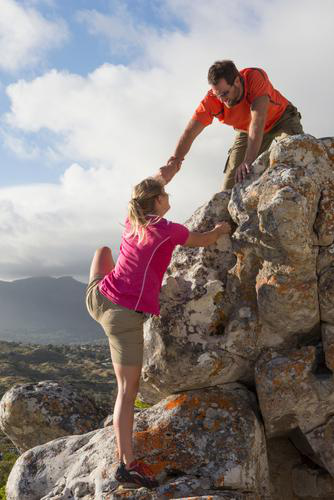

  0%|          | 2/21377 [00:12<32:32:34,  5.48s/it]

 what does the image describe?[cosHint lv3][diffHint lv2][outdoors]Wide shot of a male and female rock climber standing on top of a rock[cosHint lv3][diffHint lv2][outdoors]Vertical portrait of a male rock climber smiling at the camera[cosHint lv3][diffHint lv3][outdoors]Vertical shot of a male rock climber holding on to the edge of a rock[cosHint lv3][diffHint lv1][outdoors]View of a middle aged man rock climbing[shot_style]Close up shot of | Low angle vertical shot of | Wide shot of | Vertical shot of | [Location][NULL]
['Vertical shot of a male and female rock climber standing on a rock']


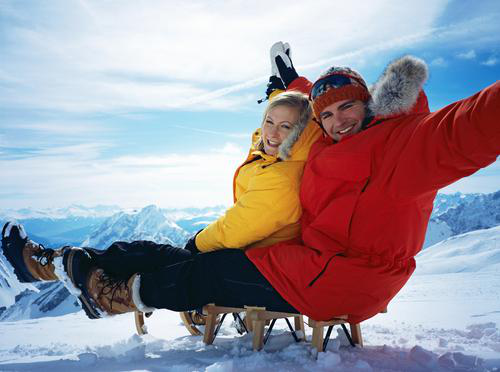

  0%|          | 3/21377 [00:13<19:07:27,  3.22s/it]

 what does the image describe?[cosHint lv3][diffHint lv1][outdoors]Children on sled in snow on mountain winter vacation at camera[cosHint lv3][diffHint lv1][outdoors]Senior couple in coats on winter day in the mountains[cosHint lv3][diffHint lv1][outdoors]Teenage boy on slope on skiing holiday Tirol Austria Europe[cosHint lv2][diffHint lv1][outdoors]Young woman with skis standing in mountains on winter day[shot_style]Low angle view of | [Location][NULL]
['Family on sled in snow on mountain winter vacation at camera']


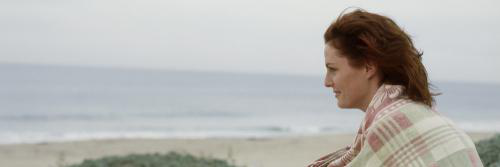

  0%|          | 4/21377 [00:14<13:23:07,  2.25s/it]

 what does the image describe?[cosHint lv2][diffHint lv1][outdoors]A woman holding a shell to her ear[cosHint lv2][diffHint lv1][outdoors]Wide shot of a female in swimwear walking on the beach with an equipment bucket[cosHint lv1][diffHint lv1][outdoors]Loving couple sitting and hugging on winter beach from behind[cosHint lv1][diffHint lv1][outdoors]Portrait of a serious looking man in a tropical garden[shot_style]Blurred view of | View of | View of | View of | [Location][diffHint lv2][outdoors]Cape Town South Africa | 
['A woman looking out to sea']


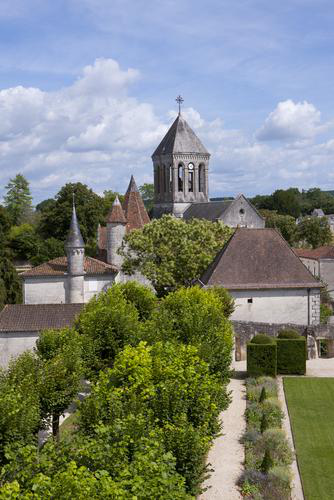

  0%|          | 5/21377 [00:15<10:16:10,  1.73s/it]

 what does the image describe?[cosHint lv3][diffHint lv2][outdoors]Rooftops of idyllic village Bourdeilles Dordogne France[cosHint lv2][diffHint lv2][outdoors]Rooftops of idyllic village Bourdeilles Dordogne France[cosHint lv2][diffHint lv1][outdoors]View to Valdemossa Mallorca Spain[cosHint lv2][diffHint lv2][outdoors]View of town and bridge spanning river on sunny day Jarnac and the Charente river West Central France[shot_style]Close up of | [Location][diffHint lv2][outdoors]Alcazar Seville Spain | [diffHint lv2][outdoors]Seville Spain | 
['View to idyllic village Bourdeilles Dordogne France']


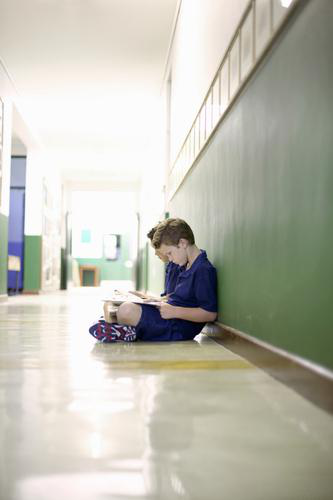

  0%|          | 6/21377 [00:15<7:55:09,  1.33s/it] 

 what does the image describe?[cosHint lv1][diffHint lv1][indoors]High school girls assembling a robotic structure in a science class with a classmate watching them[cosHint lv1][diffHint lv2][indoors]View of young boy concentrating on writing[cosHint lv1][diffHint lv1][indoors]Female high school student drawing working at desk in art lesson[cosHint lv1][diffHint lv1][indoors]Wide shot of an art teacher watching middle school students paint during an art class[shot_style]Portrait of | Portrait of | [Location][NULL]
['Vertical shot of a young boy concentrating on writing in a science class']


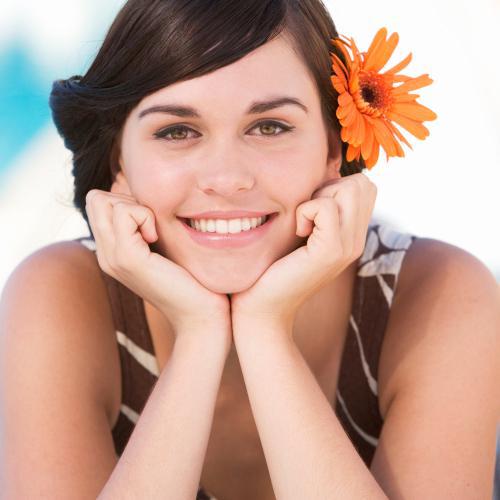

  0%|          | 7/21377 [00:16<6:15:58,  1.06s/it]

 what does the image describe?[cosHint lv2][diffHint lv1][indoors]A middle aged woman listening to mp3 music player[cosHint lv2][diffHint lv1][food]Young woman in underwear eating healthy apple snack[cosHint lv2][diffHint lv1][outdoors]Portrait of a young woman in the street carrying a shoulder bag[cosHint lv2][diffHint lv1][outdoors]Portrait of a smiling woman[shot_style][NULL][Location][NULL]
['Portrait of a young woman holding a flower']


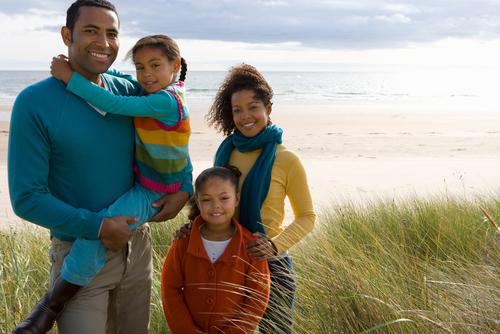

  0%|          | 8/21377 [00:16<5:40:06,  1.05it/s]

 what does the image describe?[cosHint lv3][diffHint lv1][outdoors]Medium shot of a happy couple standing at the shore of a sunny beach[cosHint lv2][diffHint lv1][outdoors]A small family of three sitting on a cold beach in front of tall grass while smiling at the camera[cosHint lv2][diffHint lv1][outdoors]Medium shot of a man carrying a woman on his back while walking along the shore of a sunny beach[cosHint lv2][diffHint lv3][misc]Little girl running into her father's open arms at the beach as her mother is watching from the background on an overcast windy day[shot_style]Close up of | Close up of | [Location][NULL]
['Portrait shot of a couple piggybacking their children in a sunny beach']


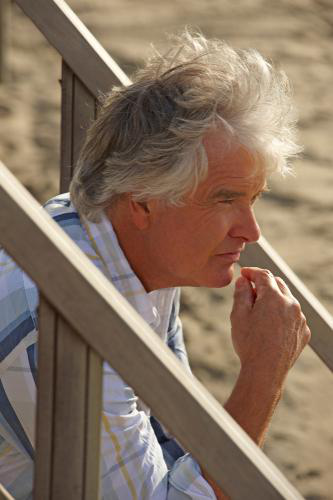

  0%|          | 9/21377 [00:17<4:39:49,  1.27it/s]

 what does the image describe?[cosHint lv1][diffHint lv1][outdoors]Portrait of a senior woman[cosHint lv1][diffHint lv1][outdoors]Close up of senior woman smiling[cosHint lv1][diffHint lv1][outdoors]Portrait of a senior woman at the beach[cosHint lv1][diffHint lv1][outdoors]Portrait of a smiling senior woman in front of tropical foliage[shot_style][NULL][Location][diffHint lv2][outdoors]Trollstigen The Troll Path Rauma Norway | 
['Senior man sitting on a deck chair']


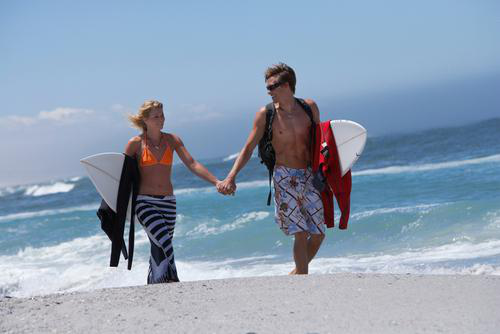

  0%|          | 10/21377 [00:18<4:41:23,  1.27it/s]

 what does the image describe?[cosHint lv4][diffHint lv1][misc]Horizontal shot of a father chasing his daughter in water at the beach on a sunny day[cosHint lv3][diffHint lv2][outdoors]Medium shot of the Backside of a group of friends in swimwear walking along the beach holding surfboards[cosHint lv3][diffHint lv1][outdoors]Wide shot of elderly couple holding hands and flying kite on a sunny beach[cosHint lv3][diffHint lv1][outdoors]Full length of a young happy couple carrying yellow surfboards on beach over sand dunes[shot_style]Wide shot of | Wide shot of | Medium shot of | Close up shot of | [Location][NULL]
['Horizontal shot of a young couple holding hands and walking along the beach holding surfboards']


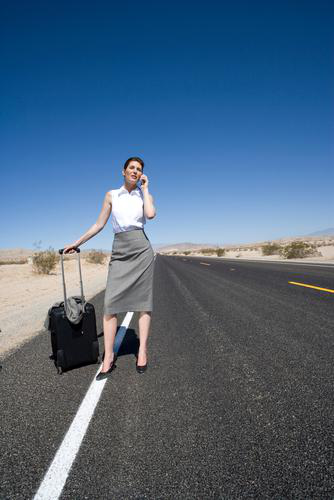

  0%|          | 11/21377 [00:18<4:23:10,  1.35it/s]

 what does the image describe?[cosHint lv4][diffHint lv3][office]Full length shot of a businesswoman with luggage on a road in the desert[cosHint lv4][diffHint lv2][electronics]Horizontal shot of a businessman sitting on a filing cabinet using a mobile phone in the middle of an open road in the desert[cosHint lv3][diffHint lv1][office]Vertical shot of a businessman with hands on hips on a yellow line in the middle of a road in the desert[cosHint lv2][diffHint lv1][misc]View of long open road at sunrise in arid landscape[shot_style]Full length shot of | Vertical portrait of | Low angle view of | Horizontal shot of | [Location][NULL]
['Vertical shot of a businesswoman with luggage on a road in the desert']


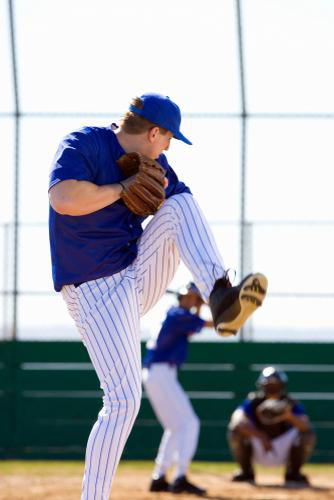

  0%|          | 12/21377 [00:19<3:49:29,  1.55it/s]

 what does the image describe?[cosHint lv2][diffHint lv1][outdoors]Young boy catching a baseball[cosHint lv1][diffHint lv1][misc]cutout of baseball team in blue uniforms celebrating[cosHint lv1][diffHint lv1][outdoors]Portrait boy with catcher's mitt[cosHint lv1][diffHint lv1][outdoors]Young boy being lifted up by baseball coach[shot_style]Portrait of | Portrait of | [Location][diffHint lv3][outdoors]Balboa Park | 
['Young boy throwing a baseball']


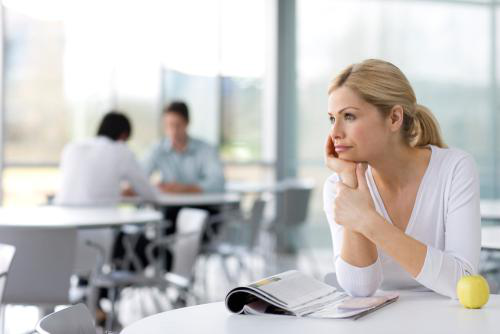

  0%|          | 13/21377 [00:19<4:02:56,  1.47it/s]

 what does the image describe?[cosHint lv3][diffHint lv1][office]A horizontal view of two businessmen using a laptop while working in the conference room[cosHint lv3][diffHint lv1][electronics]A businessman in an office with two colleagues in background looking at laptop[cosHint lv3][diffHint lv1][indoors]A man and woman in formal business suit looking into a digital tablet while sitting at a table in the lobby[cosHint lv3][diffHint lv1][electronics]A medium shot of a businessman looking at a laptop while drinking coffee in airport lounge[shot_style][NULL][Location][NULL]
['A portrait of a young businesswoman thinking while sitting at the table with a book and coffee in the conference room']


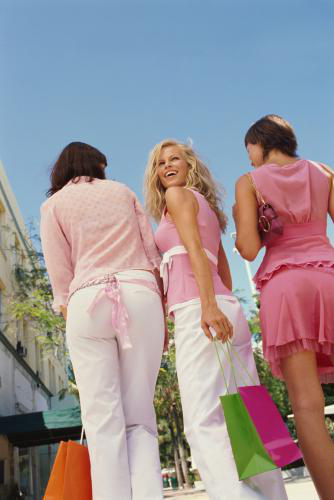

  0%|          | 14/21377 [00:20<3:41:53,  1.60it/s]

 what does the image describe?[cosHint lv1][diffHint lv1][indoors]Portrait of teenage girls touching toes in gym[cosHint lv1][diffHint lv1][stocky_setting]Couple walking arm in arm carrying shopping bags[cosHint lv1][diffHint lv1][office]Portrait of group of businesswomen[cosHint lv1][diffHint lv1][outdoors]couple having fun in the park[shot_style]Close up | Close up of | [Location][NULL]
['Low angle view of teenage girls walking with shopping bags']


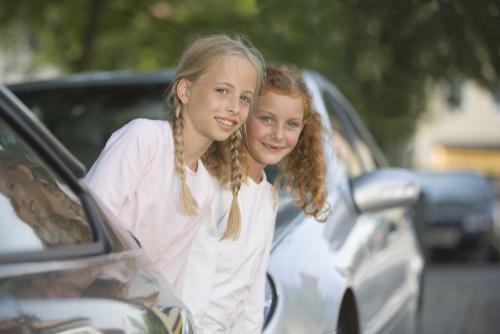

  0%|          | 15/21377 [00:21<3:44:46,  1.58it/s]

 what does the image describe?[cosHint lv2][diffHint lv1][office]Portrait of smiling woman lying on automobile hood in a car dealership showroom[cosHint lv1][diffHint lv1][outdoors]Close up of a woman spraying water on the bonnet to wash off the soap[cosHint lv1][diffHint lv1][misc]Wide shot of a beautiful woman checking the broken down automobile by opening the bonnet[cosHint lv1][diffHint lv1][outdoors]Retired senior couple driving convertible car with woman stretching arms in air[shot_style]Rear view of | [Location][NULL]
['Portrait of two young women leaning on automobile hood in a car dealership showroom']


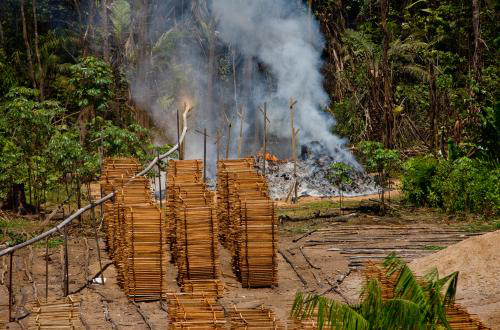

  0%|          | 16/21377 [00:21<3:31:57,  1.68it/s]

 what does the image describe?[cosHint lv1][diffHint lv1][outdoors]Part of the Bora Village Rio Ampyacu Amazon River Peru[cosHint lv1][diffHint lv1][outdoors]View of a beach at Hacha falls Canaima National Park Venezuela[cosHint lv1][diffHint lv2][office]Lumber industry at Breves Channels Brazil[cosHint lv1][diffHint lv2][office]Lumber industry at Breves Channels Brazil[shot_style][NULL][Location][diffHint lv3][outdoors]Alter do Chao Rio Tapajos Amazon River Brazil | [diffHint lv2][outdoors]Breves Channels Brazil | [diffHint lv2][office]Breves Channels Brazil | [diffHint lv2][office]Breves Channels Brazil | [diffHint lv2][office]Breves Channels Brazil | [diffHint lv2][outdoors]Basilica Nossa Senhora de Nazare Belem Brazil | 
['Fishing logs at Breves Channels Brazil']


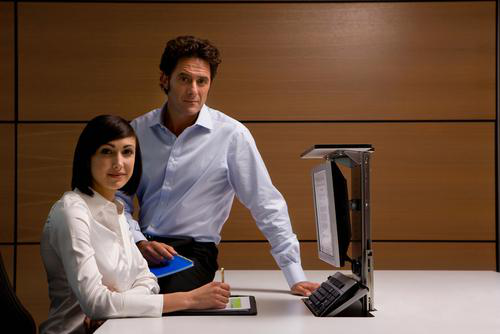

  0%|          | 17/21377 [00:22<3:43:34,  1.59it/s]

 what does the image describe?[cosHint lv4][diffHint lv1][office]Mature businessman working at computer in office[cosHint lv4][diffHint lv1][indoors]A medium shot of a happy businessman looking up while sitting in front of a computer with paperwork in office[cosHint lv3][diffHint lv3][indoors]A portrait shot of a businesswoman thinking while sitting at her desk in front of a computer[cosHint lv3][diffHint lv1][indoors]A vertical shot of a businessman and businesswoman talking at a desk in front of a computer in office[shot_style]A portrait shot of | A medium shot of | A medium shot of | A portrait shot of | [Location][NULL]
['A medium shot of a happy businessman and businesswoman talking at desk in front of a computer']


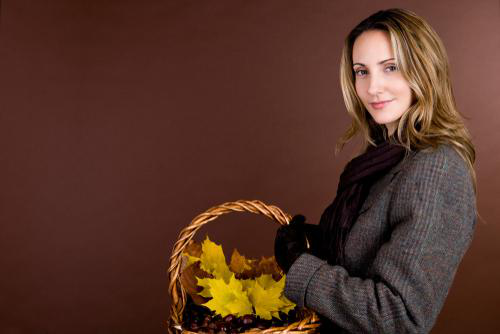

  0%|          | 18/21377 [00:22<3:16:47,  1.81it/s]

 what does the image describe?[cosHint lv2][diffHint lv2][indoors]A mid adult woman holding a pumpkin[cosHint lv2][diffHint lv2][indoors]A mid adult woman lifting a pumpkin[cosHint lv2][diffHint lv2][indoors]A mid adult woman holding a plate of clementines[cosHint lv2][diffHint lv2][indoors]A mid adult woman holding an apple[shot_style]Portrait of | [Location][NULL]
['A mid adult woman holding a pumpkin']


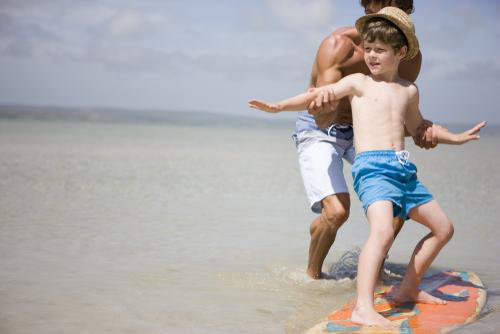

  0%|          | 19/21377 [00:23<2:57:33,  2.00it/s]

 what does the image describe?[cosHint lv2][diffHint lv3][outdoors]Family running together on beach[cosHint lv2][diffHint lv1][outdoors]Portrait of a mature woman in swimming cap by a friend in sunhat on the beach[cosHint lv2][diffHint lv2][outdoors]Family running together on beach[cosHint lv2][diffHint lv3][outdoors]Father and boys running on beach[shot_style]Close up of | [Location][NULL]
['Father and boys running in surf on beach']


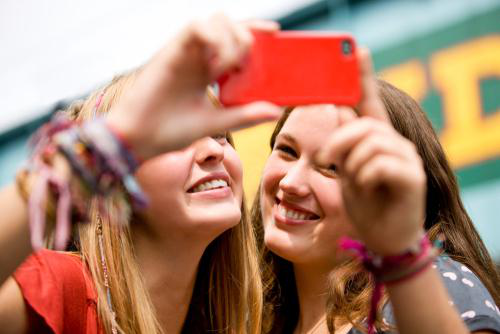

  0%|          | 20/21377 [00:23<3:15:41,  1.82it/s]

 what does the image describe?[cosHint lv1][diffHint lv1][outdoors]Horizontal head and shoulder portrait of two jubilant young women outdoors with one smiling and holding a mobile phone[cosHint lv1][diffHint lv1][outdoors]Loving young couple taking selfie in desert[cosHint lv1][diffHint lv1][outdoors]Young happy girls looking at each other outdoors[cosHint lv1][diffHint lv1][electronics]Two young women on beach using mobile phone on summer vacation[shot_style]Studio beauty shot with | Detail of | [Location][NULL]
['Portrait of two young women taking selfies with a mobile phone']


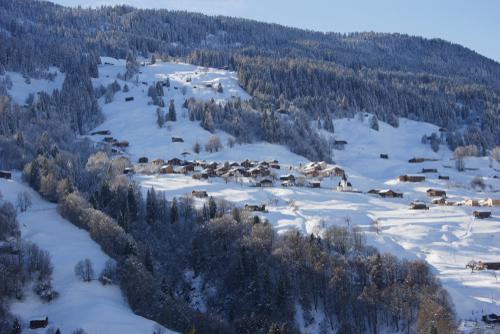

  0%|          | 21/21377 [00:24<3:27:42,  1.71it/s]

 what does the image describe?[cosHint lv3][diffHint lv2][outdoors]View from Luesener Alm Dolomite Alps Alps South Tyrol Italy[cosHint lv3][diffHint lv1][outdoors]High angle view of Klosters in winter Davos Grisons Switzerland[cosHint lv3][diffHint lv1][outdoors]Farm in snowy landscape Upper Bavaria Germany[cosHint lv3][diffHint lv1][outdoors]View to Doerflein z Mutt village Zmutt Zermatt Valais Switzerland Europe[shot_style]Close up of | View from | [Location][diffHint lv3][outdoors]Frauenkirch near Davos Grisons Switzerland | [diffHint lv3][outdoors]Wuerm River Wuerm Valley Bavaria Germany | [diffHint lv3][outdoors]Luesener Alm to Peitlerkofel Dolomite Alps South Tyrol Italy | [diffHint lv2][outdoors]Dolomite Alps South Tyrol Italy | 
['View to Luesener Alm Dolomite Alps South Tyrol Italy']


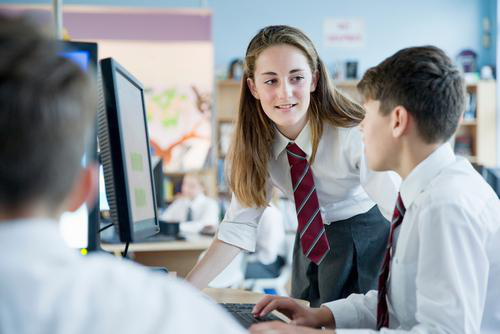

  0%|          | 22/21377 [00:25<6:46:07,  1.14s/it]

 what does the image describe?[cosHint lv4][diffHint lv3][misc]Focused schoolgirls in private school uniform sharing computer in the computer lab[cosHint lv3][diffHint lv3][misc]Portrait of a focused schoolgirl in a private school uniform studying at a computer in a computer lab[cosHint lv3][diffHint lv3][misc]Schoolgirl in private school uniform using computer in the computer lab[cosHint lv3][diffHint lv1][indoors]High school girls assembling a robotic structure in a science class with a classmate watching them[shot_style]Portrait of | Silhouetted reflection of | [Location][NULL]
['Focused schoolgirls in private school uniform sharing computer in the computer lab']


KeyboardInterrupt: ignored

In [10]:
#inference
from component.ofa.modeling_ofa import OFAModelForCaption, OFAModel
from component.ofa.tokenization_ofa import OFATokenizer 
from torchvision import transforms
from PIL import Image
from tqdm import tqdm
import torch
import os
import base64
from datetime import date, datetime
from io import BytesIO
import datetime
test = True

csv_path = '../NICE_tsv/'

if test:
  image_file = f'{csv_path}test_image(need to delete backslash).tsv'  ## tsv(byte) read pictures faster than jpg 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = OFAModel.from_pretrained(inference_model).to(device)
print(inference_model)
tokenizer = OFATokenizer.from_pretrained('./vocab' )
model.eval()


mean, std = [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]
resolution = 256
patch_resize_transform = transforms.Compose([
        lambda image: image.convert("RGB"),
        transforms.Resize((resolution, resolution), interpolation=Image.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)
    ])

resultDF = pd.DataFrame(columns = ['public_id', 'caption'])

iter = 0
batch_size = 1
pic_list = []
save = 0
with open(image_file, 'r', encoding='utf8') as f:
  lines = f.readlines()
  with torch.no_grad():
    for line in tqdm(lines):
      pic_id, image_content = line.split('\t')
      
          
      if test:
        pic_id = pic_id[:-1]##didn't erase \\ at tsv

        txt = " what does the image describe?"
        txt+= caption_result[pic_id]
        
        inputs = tokenizer([txt], return_tensors="pt").input_ids.to(device)
        img = Image.open(BytesIO(base64.urlsafe_b64decode(image_content)))
        
      else:
        img = Image.open(f'{csv_path}val/{pic_id}.jpg')

      if iter == 0:
        patch_img = patch_resize_transform(img).unsqueeze(0).to(device)
        pic_list = [pic_id]
      else:
        imsi_img = patch_resize_transform(img).unsqueeze(0).to(device)
        patch_img = torch.cat((patch_img, imsi_img), dim = 0)
        pic_list.append(pic_id)
    
      iter+=1

      if iter== batch_size:## last batch size issue
        iter = 0
        gen = model.generate(inputs.repeat(batch_size,1), patch_images=patch_img, 
                            num_beams=5, no_repeat_ngram_size=3, max_length = 40
                            , use_cache=False )
        gen_sentence = tokenizer.batch_decode(gen, skip_special_tokens=True)
        
        ## erase if you want to full inference
        img.show()
        print(txt)
        print(gen_sentence)


        batch_df = pd.DataFrame(columns = ['public_id', 'caption'])
        for id,caption in zip(pic_list, gen_sentence):

          imsiSeries = pd.Series({'public_id':id, 'caption': caption})
          imsi_df = imsiSeries.to_frame().transpose()
          batch_df= pd.concat([batch_df,imsi_df],ignore_index = True)
        resultDF = pd.concat([resultDF,batch_df],ignore_index = True)

      # if save %2000 == 0:  save while inferencing
      #   resultDF.to_csv(f'../submission.csv', encoding = 'utf-8', index = False)
      # save+=1

resultDF.to_csv(f'../submission_final.csv', encoding = 'utf-8', index = False)